# Monte Carlo Simulations for Heat in Place

Updated Unknown_Well1: Average Temp Range: [62.606499071725054, 76.51905442099729]
Updated Unknown_Well2: Average Temp Range: [89.1017127161119, 108.90209331969233]
Updated Known_LONCCARICA_1: Average Temp Range: [54.03062584342907, 66.03743158641332]
Updated Known_REZOVACCKE_KRCCEVINE_1: Average Temp Range: [71.33824856569093, 87.19119269140003]
Updated Known_REZOVACCKE_KRCCEVINE_2: Average Temp Range: [85.47302888414981, 104.46703530284977]
Updated Known_SUHOPOLJE_1: Average Temp Range: [82.63155244924125, 100.99411966018377]
Updated Known_VIROVITICA_1: Average Temp Range: [80.58681965966403, 98.49500180625604]
Updated Known_VIROVITICA_3ALFA: Average Temp Range: [91.81758286476308, 112.22149016804377]
Final well_data:
{'Unknown_Well1': {'reservoir_area': [1000000.0, 1200000.0], 'reservoir_thickness': [50, 70], 'porosity': [0.12, 0.18], 'rock_density': [2600, 2700], 'rock_specific_heat': [850, 950], 'fluid_density': [0.8, 1.1], 'fluid_spesific_heat': [850, 950], 'average_reservoir_tem

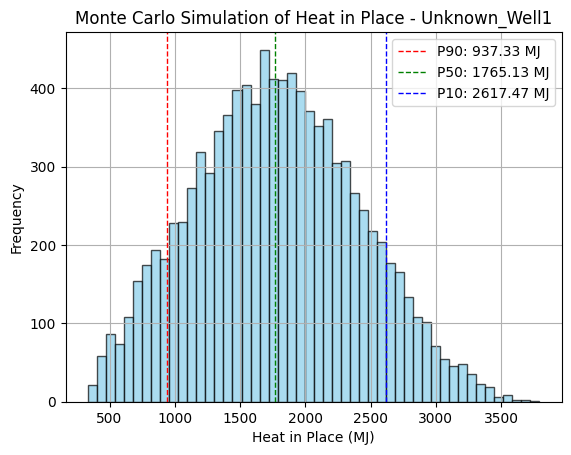

Results for Unknown_Well2:
  P90: 4112.32 MJ
  P50: 5316.81 MJ
  P10: 6655.14 MJ


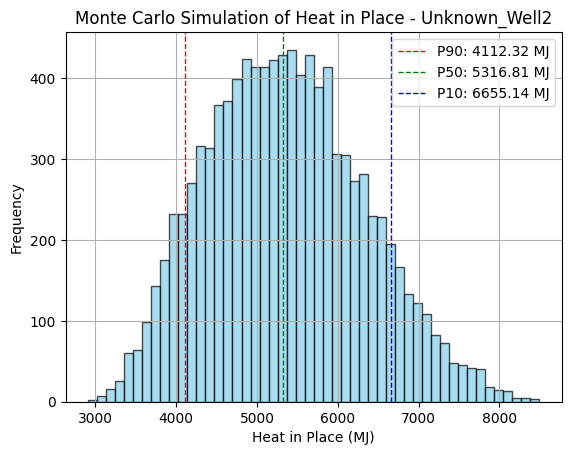

Results for Known_LONCCARICA_1:
  P90: -135.56 MJ
  P50: 591.32 MJ
  P10: 1343.91 MJ


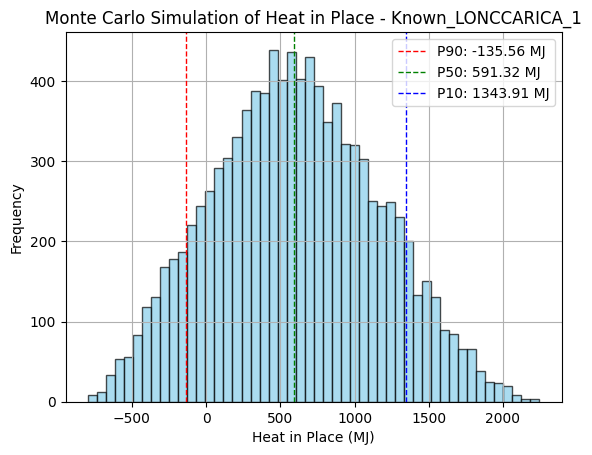

Results for Known_REZOVACCKE_KRCCEVINE_1:
  P90: 2005.29 MJ
  P50: 2915.81 MJ
  P10: 3935.75 MJ


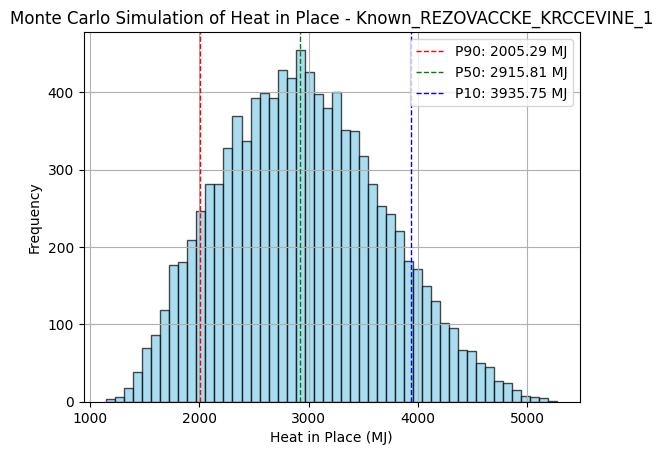

Results for Known_REZOVACCKE_KRCCEVINE_2:
  P90: 3696.81 MJ
  P50: 4816.69 MJ
  P10: 6092.18 MJ


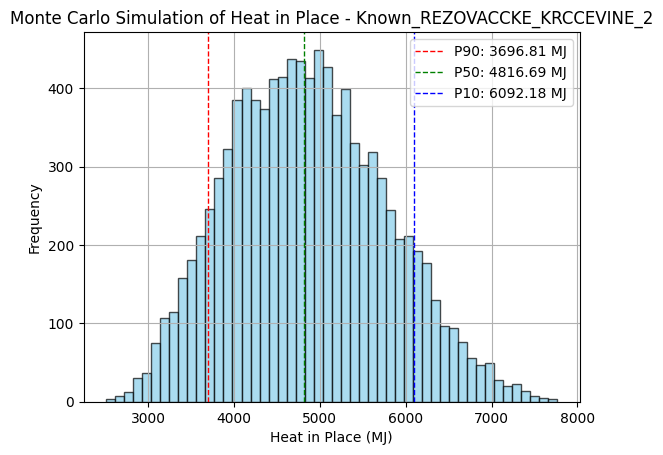

Results for Known_SUHOPOLJE_1:
  P90: 3380.67 MJ
  P50: 4456.31 MJ
  P10: 5691.98 MJ


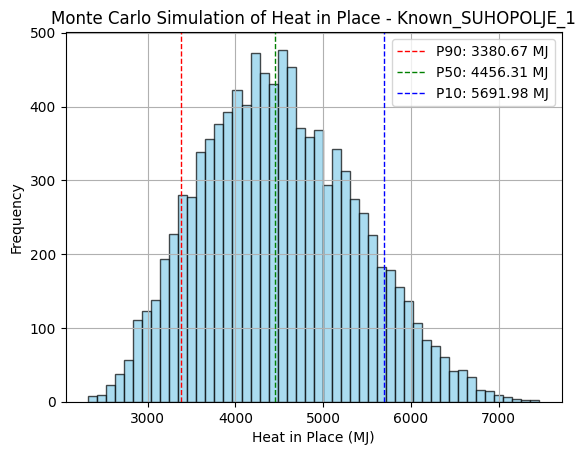

Results for Known_VIROVITICA_1:
  P90: 3114.01 MJ
  P50: 4171.17 MJ
  P10: 5333.84 MJ


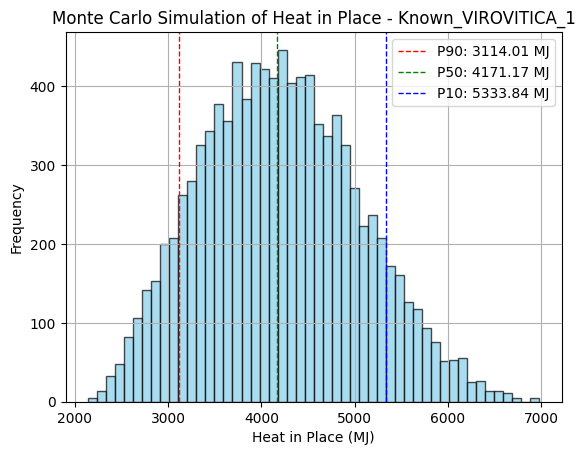

Results for Known_VIROVITICA_3ALFA:
  P90: 4451.91 MJ
  P50: 5651.50 MJ
  P10: 7085.87 MJ


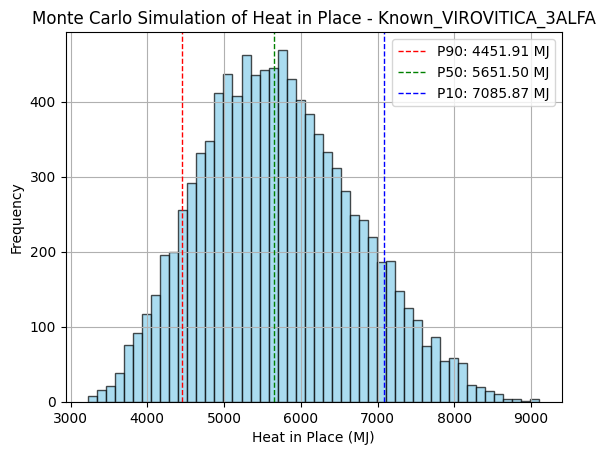

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

# Paths to the CSV files
files = {
    "Unknown_Well1": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW1.csv',
    "Unknown_Well2": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Unknown Wells/predictionsUW2.csv',
    "Known_LONCCARICA_1": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/LONCCARICA-1 (points).csv',
    "Known_REZOVACCKE_KRCCEVINE_1": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/REZOVACCKE_KRCCEVINE-1 (points).csv',
    "Known_REZOVACCKE_KRCCEVINE_2": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/REZOVACCKE_KRCCEVINE-2 (points).csv',
    "Known_SUHOPOLJE_1": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/SUHOPOLJE-1 (points).csv',
    "Known_VIROVITICA_1": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/VIROVITICA-1 (points).csv',
    "Known_VIROVITICA_3ALFA": '/Users/vegardhatleli/Library/Mobile Documents/com~apple~CloudDocs/NTNU/09 - I&IKT Høst 2024/GeoHackathon/DataLeapfrog/Known Wells/VIROVITICA-3ALFA (points).csv'
}

# Initialize the well_data dictionary
well_data = {}

# Iterate over all files and calculate the average temperature range
for well_name, file_path in files.items():
    # Load the CSV file and drop the "MD" column if it exists
    try:
        df = pd.read_csv(file_path)
        
        # Calculate the average of the TEMP column
        average_temp = df["TEMP"].mean()
        
        # Create a range for average reservoir temperature (±10% for uncertainty)
        average_reservoir_temp_range = [average_temp * 0.9, average_temp * 1.1]
        
        # Update the well_data dictionary
        well_data[well_name] = {
            "reservoir_area": [1e6, 1.2e6],  # Example placeholder, update as needed
            "reservoir_thickness": [50, 70],  # Example placeholder, update as needed
            "porosity": [0.12, 0.18],  # Example placeholder, update as needed
            "rock_density": [2600, 2700],  # Example placeholder, update as needed
            "rock_specific_heat": [850, 950],  # Example placeholder, update as needed
            "fluid_density": [0.8, 1.1],  # Example placeholder, update as needed
            "fluid_spesific_heat": [850, 950],  # Example placeholder, update as needed
            "average_reservoir_temp": average_reservoir_temp_range,
            "reinjection_temp": [50, 60]  # Example placeholder, update as needed
        }
        print(f"Updated {well_name}: Average Temp Range: {average_reservoir_temp_range}")
    
    except Exception as e:
        print(f"Error processing {well_name}: {e}")

# Print the final well_data dictionary
print("Final well_data:")
print(well_data)


# Monte Carlo simulation for each well
for well, params in well_data.items():
    # Generate random samples for each parameter
    reservoir_area = np.random.uniform(*params["reservoir_area"], 10000)
    reservoir_thickness = np.random.uniform(*params["reservoir_thickness"], 10000)
    porosity = np.random.uniform(*params["porosity"], 10000)
    rock_density = np.random.uniform(*params["rock_density"], 10000)
    rock_specific_heat = np.random.uniform(*params["rock_specific_heat"], 10000)
    fluid_spesific_heat = np.random.uniform(*params["fluid_spesific_heat"], 10000)
    fluid_density = np.random.uniform(*params["fluid_density"], 10000) 
    average_reservoir_temp = np.random.uniform(*params["average_reservoir_temp"], 10000)
    reinjection_temp = np.random.uniform(*params["reinjection_temp"], 10000)
    
    # Heat in place calculation
    heat_in_place = (
        ((1-porosity)*rock_specific_heat*rock_density + porosity*fluid_spesific_heat*fluid_density)*reservoir_thickness*(average_reservoir_temp-reinjection_temp)
    )  # Total Joules
    
    # Convert Joules to MegaJoules
    heat_in_place_mj = heat_in_place / 1e6
    
    # Calculate P90, P50, and P10
    p90 = np.percentile(heat_in_place_mj, 10)
    p50 = np.percentile(heat_in_place_mj, 50)
    p10 = np.percentile(heat_in_place_mj, 90)
    
    # Print results for the well
    print(f"Results for {well}:")
    print(f"  P90: {p90:.2f} MJ")
    print(f"  P50: {p50:.2f} MJ")
    print(f"  P10: {p10:.2f} MJ")
    
    # Visualization
    plt.hist(heat_in_place_mj, bins=50, color='skyblue', edgecolor='black', alpha=0.7)
    plt.axvline(p90, color='red', linestyle='dashed', linewidth=1, label=f'P90: {p90:.2f} MJ')
    plt.axvline(p50, color='green', linestyle='dashed', linewidth=1, label=f'P50: {p50:.2f} MJ')
    plt.axvline(p10, color='blue', linestyle='dashed', linewidth=1, label=f'P10: {p10:.2f} MJ')
    plt.title(f"Monte Carlo Simulation of Heat in Place - {well}")
    plt.xlabel("Heat in Place (MJ)")
    plt.ylabel("Frequency")
    plt.legend()
    plt.grid(True)
    plt.show()
